# Book Recommender System 
# by Anzhelika Simonyan, Armen Mkrtumyan, Diana Tumasyan, Anzhela Davityan

# Data Preproecessing

## Including necessary libraries

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests #For loading the dictionary of English words
import re

## General idea about the dataset

In [419]:
data = pd.read_csv('Raw_Dataset - Sheet1.csv')

In [420]:
#data["Բնակության վայրը"].to_csv("full_Diana.csv")

In [421]:
data

,Սեռ,Բնակության վայրը,Քաղաք/Գյուղ,Տարիք,Արկածային,Բանաստեղծություններ,Դասական,Կոմիքս,Դետեկտիվ.,Դրամա,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
0,Աղջիկ,Երևան,Երևան,12-14,Արկածային,NaN,Դասական,Կոմիքս,Դետեկտիվ.,Դրամա,...,Հերման Հեսսե,Վարդկես Պետրոսյան,Վիլյամ Սարոյան,Այդ Ալյեն,NaN,NaN,NaN,NaN,NaN,NaN
1,Աղջիկ,Երևան,NaN,23+,Արկածային,NaN,Դասական,NaN,Դետեկտիվ.,NaN,...,Томас Гарди,Драйзер,Франк Тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Աղջիկ,Տավուշ,Նոյեմբերյան,15-18,Արկածային,NaN,Դասական,NaN,NaN,Դրամա,...,Վարդգես Պետրոսյան,Հրաչյա Մանուկյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Աղջիկ,Երևան,NaN,15-18,NaN,NaN,NaN,NaN,NaN,NaN,...,Մուրացան,Շիրվանզադե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Աղջիկ,Լոռի,Ստեփանավան,12-14,Արկածային,NaN,NaN,NaN,Դետեկտիվ.,Դրամա,...,Գուրգեն Մահարի,Նար֊Դոս,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Աղջիկ,Սյունիք,NaN,15-18,Արկածային,NaN,NaN,NaN,Դետեկտիվ.,Դրամա,...,Դյումա,Հեսսե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Աղջիկ,Սյունիք,Սիսիան,15-18,Արկածային,NaN,NaN,NaN,NaN,Դրամա,...,Վարդգես Պետրոսյան,Ժորժ Սանդ,Շիրվանզադե,Վահան Տերյան,Պաուլո Կուելիո,NaN,NaN,NaN,NaN,NaN
997,Աղջիկ,Սյունիք,NaN,15-18,NaN,NaN,Դասական,NaN,Դետեկտիվ.,Դրամա,...,Չունեմ սիրած հեղինակներ որպես այդպիսին,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Աղջիկ,Սյունիք,NaN,12-14,NaN,NaN,NaN,NaN,NaN,Դրամա,...,Hovhannes Tumanyan,Nar_dos,Avetiq Isahakyan,Hamo Sahyan,Daniel Varujan,NaN,NaN,NaN,NaN,NaN


In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Սեռ                  1000 non-null   object
 1   Բնակության վայրը     1000 non-null   object
 2   Քաղաք/Գյուղ          452 non-null    object
 3   Տարիք                1000 non-null   object
 4   Արկածային            457 non-null    object
 5   Բանաստեղծություններ  160 non-null    object
 6   Դասական              284 non-null    object
 7   Կոմիքս               59 non-null     object
 8   Դետեկտիվ.            364 non-null    object
 9   Դրամա                546 non-null    object
 10  Առակ                 37 non-null     object
 11  Հեքիաթ               71 non-null     object
 12  Ֆանտաստիկա           334 non-null    object
 13  Սարսափ               112 non-null    object
 14  Լեգենդ               115 non-null    object
 15  Ռոմանս               421 non-null    object
 16  Կենսագր

# Plotting

In [423]:
import seaborn as sns
colors = sns.color_palette('dark')[0:5]

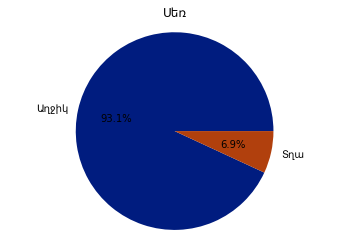

In [424]:
#Pie chart
data1 = pd.read_csv("Anzhela.csv")
counts = data1['Սեռ'].value_counts()
#colors = ['violet', 'slateblue']
plt.pie(counts, labels=counts.index,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Սեռ')
plt.show()

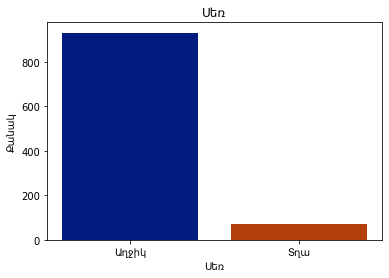

In [425]:
# Bar chart
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Սեռ')
plt.ylabel("Քանակ")
plt.title('Սեռ')
plt.show()

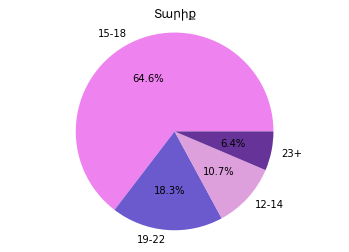

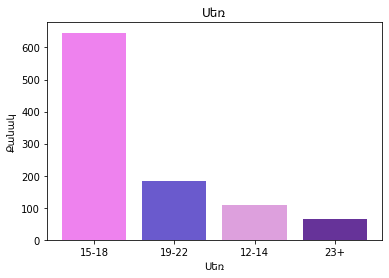

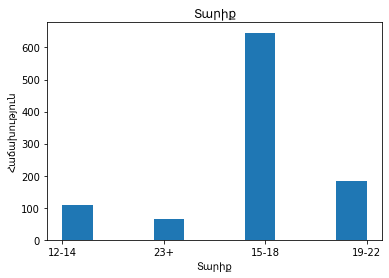

In [426]:
#Pie chart
data1 = pd.read_csv("Tariq.csv")
counts = data1['Տարիք'].value_counts()
colors = ['violet', 'slateblue',"plum","rebeccapurple"]
plt.pie(counts, labels=counts.index,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Տարիք')
plt.show()

#Bar chart
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Սեռ')
plt.ylabel("Քանակ")
plt.title('Սեռ')
plt.show()

# Histogram
plt.hist(data1['Տարիք'], bins=10)
plt.xlabel('Տարիք')
plt.ylabel('Հաճախություն')
plt.title('Տարիք')
plt.show()

# For now, we only worked on the most difficult part - cleaning up the Books and Authors, because users have inputted their information in different ways

#### Something like this

In [427]:
data.loc[[1,998, 100, 651, 638, 101, 104, 106,732, 122], "Հեղինակ 1":"Հեղինակ 10"]

,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
1,Томас Гарди,Драйзер,Франк Тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Hovhannes Tumanyan,Nar_dos,Avetiq Isahakyan,Hamo Sahyan,Daniel Varujan,NaN,NaN,NaN,NaN,NaN
100,Ագաթա Քրիստի,Արթուր Կոնան Դոյլ,Ալեքսանդր Դյումա,Պարույր Սևակ ։),Օ'Հենրի,Մարկ Տվեյն,Շեքսպիր,Շառլոթ Բրոնտե,Վահան Տերյան,Շիրվանզադե
651,Джон Грин,Տա Թևեր,Джоджо Мойес,Շիրվանզադե,Շեքսպիր,NaN,NaN,NaN,NaN,NaN
638,Բալզակ <>,Ջեյ Օսթին <>,Ջոն Գրին <>,Հենրի Հագարդ<>,Սթիվ Ջոբս,NaN,NaN,NaN,NaN,NaN
101,Jane Austin,J. K. Rowling,Charlotte Bronte,Louisa May Alcott,John Green,Oscar Wilde,NaN,NaN,NaN,NaN
104,Ջոն Գրին,Գ.Գ Մարկես,Կլոդ Սիմոն,Պաուլու Կոելյու,Ժան-Քրիստոֆ-Ռյուֆեն,NaN,NaN,NaN,NaN,NaN
106,Դժվարանում եմ առանձնացնել,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,«Ինձ պիոններ չնվիրես »😍,«Հավերժ քոնը»❤️,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Բալզակ,Մուրացան,Նար-Դոս,Թումանյան,Կաֆկա,Էլիֆ Շաֆակ,"Համո Սահյան, Վահան Տերյան",Մոպասան,Ռեմարկ,Ջեյն Օստեն


## As we can see 
## Latinatar hayeren, Դժվարանում եմ առանձնացնել, Պարույր Սևակ :), multiple languages,  or multiple authors on the same cell are inacceptable and should be removed

In [428]:
def remove_symbols(sentence):
    '''This code removes all the symbols and saves the pure text. It also keeps NaN-s.'''
    if(sentence is np.nan):
        return (np.nan)
    sentence = str(sentence)
    new_sentence = ""
    for symbol in sentence:
        if symbol.isalpha() or symbol.isnumeric() or symbol == " ":
            new_sentence += symbol
        else:
            new_sentence += " "
    string = ""
    for i in new_sentence.split():
        string += i + " "
    string = string.strip()
    return (string)

## Get the books and authors and remove unnecessary symbols and make everything lowercase for easier processing

In [429]:
books_authors = data.loc[:, "Գիրք 1" :]
books_authors.columns

Index(['Գիրք 1', 'Գիրք 2', 'Գիրք 3', 'Գիրք 4', 'Գիրք 5', 'Գիրք 6', 'Գիրք 7',
       'Գիրք 8', 'Գիրք 9', 'Գիրք 10', '_Գիրք 1_', '_Գիրք 2_', '_Գիրք 3_',
       '_Գիրք 4_', '_Գիրք 5_', '_Գիրք 6_', '_Գիրք 7_', '_Գիրք 8_', '_Գիրք 9_',
       '_Գիրք 10_', 'Հեղինակ 1', 'Հեղինակ 2', 'Հեղինակ 3', 'Հեղինակ 4',
       'Հեղինակ 5', 'Հեղինակ 6', 'Հեղինակ 7', 'Հեղինակ 8', 'Հեղինակ 9',
       'Հեղինակ 10'],
      dtype='object')

In [430]:
books_authors = books_authors.applymap(remove_symbols)
books_authors = books_authors.applymap(lambda string: string if string is np.nan else string.lower())

## As we can see all the unnecessary symbols are removed, for now it does not matter that some names are still in other languages or that first and last names are connected, because the upcoming functions will fix that for us

In [431]:
books_authors.head()

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
0,վ սարոյան,ս աղաջանյան,կ լաֆորետ,ա ալյեն,մ արեն,ա շիրվանզադե,լերմոնտով,ա դյումա,հ հեսսե,գ գ մարկես 100 տարվա մենություն,...,հերման հեսսե,վարդկես պետրոսյան,վիլյամ սարոյան,այդ ալյեն,NaN,NaN,NaN,NaN,NaN,NaN
1,один день,тесс из рода д эрбервиллей,жажда жизни,убик,пандемия,завтра,NaN,NaN,NaN,NaN,...,томас гарди,драйзер,франк тилье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,սերը ժանտախտի օրերին,NaN,NaN,ապրած և չապրած տարիներ,NaN,NaN,NaN,NaN,NaN,NaN,...,վարդգես պետրոսյան,հրաչյա մանուկյան,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,հայրենասեր օրիորդը,աստղերն են մեղավոր,քաոս,պատվի համար,731 օր քեզ համար,NaN,NaN,NaN,NaN,NaN,...,մուրացան,շիրվանզադե,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ես և նա,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,գուրգեն մահարի,նար դոս,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## This function creates a dictionary of Armenian letters and their latin "counterparts" and uses probability to convert Armenian text to Latin Armenian text, because for some letters such as "և" we have options "yev" and "ev"

In [432]:
import random

def random_choice(key, probability_of_val1):
    return key if random.random() < probability_of_val1 else 0

wordDict = {
    "ց": {"c": 0.8, "ts": 0.2},
    "ր": {"r": 1},
    "փ": {"p": 1},
    "օ": {"o": 1},
    "ք": {"q": 0.7, "k": 0.3},
    "և": {"ev": 0.7, "yev": 0.3},
    "ֆ": {"f": 1},
    "ՈՒ": {"U": 1},
    "Ու": {"U": 1},
    "ու": {"u": 1},
    "Ա": {"A": 1},
    "Գ": {"G": 1},
    "Բ": {"B": 1},
    "Ե": {"Ye": 0.1, "YE": 0.1, "E": 0.8},
    "Դ": {"D": 1},
    "Է": {"E": 1},
    "Զ": {"Z": 1},
    "Թ": {"T": 0.9, "Th": 0.05, "TH": 0.05},
    "Ը": {"Y": 0.35, "@": 0.45, "E": 0.2},
    "Ի": {"I": 1},
    "Ժ": {"ZH": 0.15, "J": 0.5, "Zh": 0.15, "G": 0.2},
    "Խ": {"Gh": 0.05, "X": 0.7, "Kh": 0.1, "KH": 0.1, "GH": 0.05},
    "Լ": {"L": 1},
    "Կ": {"K": 1},
    "Ծ": {"C": 0.3, "&": 0.1, "TS": 0.3, "Ts": 0.3},
    "Ձ": {"Dz": 0.4, "Z": 0.1, "DZ": 0.4, "D": 0.1},
    "Հ": {"H": 1},
    "Ճ": {"CH": 0.2, "Ch": 0.2, "J": 0.4, "Tch": 0.1, "C": 0.1},
    "Ղ": {"X": 0.5, "Gh": 0.25, "GH": 0.25},
    "Յ": {"Y": 0.9, "J": 0.1},
    "Մ": {"M": 1},
    "Շ": {"SH": 0.4, "Sh": 0.4, "S": 0.2},
    "Ն": {"N": 1},
    "Չ": {"4": 0.2, "CH": 0.3, "Ch": 0.4, "C": 0.1},
    "Ո": {"O": 1},
    "Ջ": {"Dj": 0.05, "J": 0.6, "DJ": 0.05, "G": 0.3},
    "Պ": {"P": 1},
    "Ս": {"S": 1},
    "Ռ": {"R": 1},
    "Տ": {"T": 1},
    "Վ": {"V": 1},
    "Ց": {"C": 0.8, "TS": 0.1, "Ts": 0.1},
    "Ր": {"R": 1},
    "Փ": {"P": 1},
    "Ւ": {"V": 1},
    "Օ": {"O": 1},
    "Ք": {"Q": 0.7, "K": 0.3},
    "Ֆ": {"F": 1},
    "ա": {"a": 1},
    "գ": {"g": 1},
    "բ": {"b": 1},
    "ե": {"ye": 0.2, "e": 0.8},
    "դ": {"d": 1},
    "է": {"e": 1},
    "զ": {"z": 1},
    "թ": {"t": 0.9, "th": 0.1},
    "ը": {"y": 0.35, "@": 0.45, "e": 0.2},
    "ի": {"i": 1},
    "ժ": {"j": 0.5, "zh": 0.3, "g": 0.2},
    "խ": {"x": 0.7, "kh": 0.2, "gh": 0.1},
    "լ": {"l": 1},
    "կ": {"k": 1},
    "ծ": {"c": 0.3, "ts": 0.6, "&": 0.1},
    "ձ": {"z": 0.1, "dz": 0.8, "d": 0.1},
    "հ": {"h": 1},
    "ճ": {"ch": 0.4, "c": 0.1, "j": 0.4, "tch": 0.1},
    "ղ": {"x": 0.5, "gh": 0.5},
    "յ": {"y": 0.9, "j": 0.1},
    "մ": {"m": 1},
    "շ": {"sh": 0.8, "s": 0.2},
    "ն": {"n": 1},
    "չ": {"4": 0.2, "ch": 0.7, "c": 0.1},
    "ո": {"o": 1},
    "ջ": {"j": 0.6, "dj": 0.1, "g": 0.3},
    "պ": {"p": 1},
    "ս": {"s": 1},
    "ռ": {"r": 1},
    "տ": {"t": 1},
    "վ": {"v": 1},
    "ւ": {"v": 1},
}
def Armenian_to_Latinatar(text):
    ''' This function bla bla bla blaaaaa '''
    second_key = " "
    mod_text = list(text)
    letter = 0;
    while letter != len(mod_text):       
        for (key, another_dict) in wordDict.items():
            try:
                if (mod_text[letter] == 'ո' and mod_text[letter+1] == 'ւ'):
                    mod_text = mod_text[:letter]+ ['u']+ mod_text[letter+2:]
                    break;
            except IndexError:
                break

            try:
                if(mod_text[letter] == 'Ո' and mod_text[letter+1] == 'Ւ'):
                    mod_text = mod_text[:letter]+ ['U']+ mod_text[letter+2:]
                    break;
            except IndexError:
                break
            if (mod_text[letter] == key):
                while(mod_text[letter] != second_key):     
                    for (second_key, value) in another_dict.items():
                        if (random_choice(second_key, value)):
                            mod_text[letter] = second_key                                
                            break;
            if (mod_text[letter] == second_key):
                break 
        letter += 1;
    return ''.join(mod_text)

In [433]:
Armenian_to_Latinatar("ԻՄ ԱՆՈՒՆԸ ԿԱՌԼեոն Է, դոն կառլեոնե")

'IM ANUN@ KARLeon E, don karlyeone'

## This second function does the opposit, it converts the Latin Armenian text to Normal Armenian,  again we had to use probability for more precise convertion system

In [434]:
wordDict_2 = {
    "zh": {"ժ" : 1},
    "ch": {"չ" : 0.8, "ճ" : 0.2},
    "ts" : {"ծ" : 1},
    "c": {"ծ" : 0.5, "ց" : 0.4, "չ" : 0.1},
    "ev": {"և": 1},
    "ye": {"ե": 1},
    "th": {"թ" : 1},
    "kh": {"խ" : 1},
    "gh": {"ղ" : 1},
    "dz": {"ձ" : 1},
    "sh": {"շ" : 1},
    "vo" : {"ո" : 1},
    "dj" : {"ջ" : 1},
    "r" : {"ր" : 0.9, "ռ" : 0.1},
    "p": {"պ": 0.7, "փ": 0.3},
    "o": {"ո": 0.7, "օ" : 0.3},
    "q": {"ք": 1},
    "k": {"կ": 1},
    "f": {"ֆ": 1},
    "u": {"ու": 1},
    "a": {"ա": 1},
    "g": {"գ": 1},
    "b": {"բ": 1},
    "e": {"ե" : 0.7, "է" : 0.3},
    "d": {"դ": 1},
    "z": {"զ": 1},
    "t": {"տ" : 0.6, "թ": 0.4},
    "y" : {"յ" : 0.6, "ը" : 0.4},
    "@": {"ը" : 1},
    "i": {"ի": 1},
    "j": {"ջ" : 0.6, "ճ" : 0.2, "ժ" : 0.2},
    "x": {"խ" : 1},
    "l" : {"լ" : 1},
    "k": {"կ": 1},
    "h": {"հ": 1},
    "m": {"մ": 1},
    "n": {"ն": 1},
    "s": {"ս": 1},
    "v": {"վ": 1},
    "w": {"ու": 1}
}
def Latin_to_Armenian(text):
    #looping through single letter
    def loop(mod_text, letter, second_key):
        while(mod_text[letter] != second_key):     
            for (second_key, value) in another_dict.items():
                if (random_choice(second_key, value)):
                    mod_text[letter] = second_key
                    break;
    second_key = " "
    mod_text = list(text)
    letter = 0;
    while letter != len(mod_text):       
        for (key, another_dict) in wordDict_2.items():
            if (letter != len(mod_text) - 1):
                #For the cases with 2 letters
                if (mod_text[letter] + mod_text[letter+1] == key):
                    while((mod_text[letter] + mod_text[letter+1]) != second_key):     
                        for (second_key, value) in another_dict.items():
                            if (random_choice(second_key, value)):
                                mod_text[letter] = second_key
                                mod_text = mod_text[:letter+1] + mod_text[letter+2:]
                                second_key = mod_text[letter]
                                break;
                        if (mod_text[letter] == second_key):
                            break
                #For the case of a 1 letter
                elif (mod_text[letter] == key):
                    loop(mod_text, letter, second_key)
            else:
                if (mod_text[letter] == key):
                    loop(mod_text, letter, second_key)
            if (mod_text[letter] == second_key):
                break
        letter += 1;
    return ''.join(mod_text)

## As you can see, since the probability of having "տ" instead of "թ" is bigger, it appears more frequently in word "Տերյան"

In [435]:
for i in range(10):
    print(Latin_to_Armenian("Vahan Totovenc".lower()))

վահան տոտօվէնց
վահան թոտովէնծ
վահան տոթովենծ
վահան տոտովենծ
վահան տոտովենծ
վահան տոտօվենծ
վահան տոտովենծ
վահան տոտովենծ
վահան տոտովենչ
վահան տոտօվենծ


## Now lets take sample from our dataset and try to convert it to Armenian

In [436]:
sample = books_authors.iloc[948:, :]
sample

,Գիրք 1,Գիրք 2,Գիրք 3,Գիրք 4,Գիրք 5,Գիրք 6,Գիրք 7,Գիրք 8,Գիրք 9,Գիրք 10,...,Հեղինակ 1,Հեղինակ 2,Հեղինակ 3,Հեղինակ 4,Հեղինակ 5,Հեղինակ 6,Հեղինակ 7,Հեղինակ 8,Հեղինակ 9,Հեղինակ 10
948,raffi xent,gabriel sundukyan pepo,hasarakac vordegiry muracan,nar dos es ev na,NaN,NaN,NaN,NaN,NaN,NaN,...,vahan teryan,paruyr sevak,nar dos,hovhannes tunanyan,NaN,NaN,NaN,NaN,NaN,NaN
949,NaN,sherlock holmes,pride and prejudice,սամվել րաֆֆի,harry potter,NaN,NaN,NaN,NaN,NaN,...,j k rowling,վահան տերյան,րաֆֆի,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,սերը ժանտախտի օրերին,թքած ունենալու նուրբ արվեստը,սիրելու արվեստը,ուշքի արի աղջիկ ջան,սամվելը,NaN,NaN,NaN,NaN,NaN,...,գարսիա մարկես,էռնեստ հեմինգուեյ,հովհաննես շիրազ,շիրվանզադե,պարույր սևակ,եղիշե չարենց,NaN,NaN,NaN,NaN
951,հարրի փոթեր գրքաշարի բոլոր մասերը,փոքրիկ իշխանը,ռոբինզոն կրուզո,տասնհինգամյա նավապետը,ոսկե կիրճը,սպանված աղավնի,վերջին ուսուցիչը,պատվի համար,սպիտակ ժանիք,թումանյան հեքիաթներ,...,հովհաննես թումանյան,անտուան դը սենթ էքզյուպերի,նար դոս,դանիել դեֆֆո,ալեքսանդ դյումա,նար դոս,NaN,NaN,NaN,NaN
952,731 or qez hamar,tqac unenalu nurb arvesty,nar dos patmvacqner,caxkac pshalarer,dprocakan tariner,sevani apin,NaN,NaN,NaN,NaN,...,hovhannes tumanyan,nar dos,hamo sahyan,daniel varujan,avetiq isahakyan,NaN,NaN,NaN,NaN,NaN
953,քաոս,ապուշը,խրճիթը,несвятые святые,հմայված հոգին,ազնավուրը ազնավուրի մասին,աստվածաշունչ,հավասարում բազմաթիվ անհայտներով,հայկական էսքիզներ,իմ սիրտը լեռներում է,...,պարույրսևակ,համո սահյան,վարդգես պետրոսյան,հրանտ մաթևոսյան,ռոմեն ռոլան,դոստոևսկի,նիցշե,սարոյան,անահիտ սեկոյան,նարեկացի
954,demian,dandelion wine,the picture of dorian gray,the alchemist,the book thief,the diary of anne frank,NaN,NaN,NaN,NaN,...,herman hesse,john green,oscar wilde,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,ինձ պիոններ չնվիրես,քո մասին են պատմում ալիքները,աստղերն են մեղավոր,harry potter,մեծ տան փոքրիկ տիրուհին,NaN,NaN,NaN,NaN,NaN,...,ուիլյամ սարոյան,ռաֆայել նահապետյան,համո սահյան,գաբրիել գարսիա մարկես,լեոնիդ անդրեև,NaN,NaN,NaN,NaN,NaN
956,առանց ընտանիքի,այնտեղ որտեղ ծաղկում են վայրի վարդեր անատոլիակ...,երեք տարի անց նույն օրը,անլռելի զանգակատուն,մարդն ափի մեջ,NaN,NaN,NaN,NaN,NaN,...,պարույր սևակ,համո սահյան,հուսիկ արա,վիկտոր հյուգո,կաֆկա,NaN,NaN,NaN,NaN,NaN
957,հայրիկ դու խենթ ես,բռնիր ձեռքս ես վախենում,ապրած և չապրած տարիներ,հարրի փոթեր,NaN,NaN,NaN,NaN,NaN,NaN,...,գաբրիել գարսիա մարկես,նար դոս,ռեմարկ,վարդգես պետրոսյան,սյունե սևադա,մարկ մենսոն,դավիթ սամվելյան,NaN,NaN,NaN


In [437]:
english_authors = pd.read_csv('final_dataset.csv')['name']
english_authors = english_authors.apply(lambda author: author.lower())

english_authors = english_authors.drop([200758, 33079, 33084, 33086,
                                        36508, 36509, 36511, 36512,
                                        36514, 36515, 37954, 40859,
                                        40861, 49418, 56222, 63543,
                                        65069, 82986, 83941, 83944,
                                        86433, 87950, 93551, 96771,
                                        118553, 122041, 130628, 145672,
                                        145674, 149089, 152630, 156705,
                                        157482, 174766, 180412, 182638, 
                                        208235, 27732, 141818])

#Removing vardges petrosyan# nairi zaryan vakhtang ananyan#stepan zoryan hovhannes grigoryan 
# english_authors = english_authors.drop([])  #Removing avetik isahakyan
# english_authors = english_authors.drop([])  #Removing armen ohanyan #aram pachyan hamo sahyan
# english_authors = english_authors.drop([])  #Removing hovhannes ishkhanyan 
# english_authors = english_authors.drop([])  #Removing markar esayan 
# english_authors = english_authors.drop([])  #Removing artak harutyunyan 
# english_authors = english_authors.drop([])  #Removing nikol pashinyan 
# english_authors = english_authors.drop([])  #Removing laura trevelyan 
# english_authors = english_authors.drop([])  #Removing anna arutunyan 
# english_authors = english_authors.drop([])  #Removing david trevelyan
# english_authors = english_authors.drop([])  #Removing susanna oroyan
# english_authors = english_authors.drop([])  #Removing ani chibukhchyan
# english_authors = english_authors.drop([])  #Removing zaven biberyan
# english_authors = english_authors.drop([])  #Removing zabel yesayan
# english_authors = english_authors.drop([])  #Removing vardan partamyan
# english_authors = english_authors.drop([])  #Removing karen antashyan
# english_authors = english_authors.drop([])  #Removing vahan zanoyan
# english_authors = english_authors.drop([])  #Removing harutyun mkrtchyan
# english_authors = english_authors.drop([]) #Removing alex banayan
# english_authors = english_authors.drop([]) #Removing aram saroyan
# english_authors = english_authors.drop([]) #Removing suren hakobyan
# english_authors = english_authors.drop([]) #Removing hovhannes tumanyan
# english_authors = english_authors.drop([]) #Removing hrant matevosyan
# english_authors = english_authors.drop([]) #Removing narine abgaryan
# english_authors = english_authors.drop([]) #Removing vahram muratyan
# english_authors = english_authors.drop([]) #Removing mariam petrosyan
# english_authors = english_authors.drop([]) #Removing aret vartanyan
# english_authors = english_authors.drop([]) #Removing svetlana bagdasaryan
# english_authors = english_authors.drop([]) #Removing hrachya saribekyan
# english_authors = english_authors.drop([]) #Removing veronika gasparyan
# english_authors = english_authors.drop([]) #Removing william saroyan
# english_authors = english_authors.drop([]) #Removing paruyr sevak
# english_authors = english_authors.drop([]) #Removing paruyr raffi

# def gtir_hayerin(sentence):
#     return(sentence.split()[-1][-3:] == "yan" and len(sentence.split()[-1]) > 5)
#np.set_printoptions(threshold=np.inf) #Print everything
#print(np.array(english_authors[english_authors.apply(gtir_hayerin)]))#.any())
#np.set_printoptions(threshold=1000) #Switch back to the old way

english_authors.head()

0          jason   wallace
1             rosan hollak
2               nanna foss
3        terri savelle foy
4    vishwas nangare patil
Name: name, dtype: object

In [438]:
print(english_authors[english_authors.str.contains("")])

0               jason   wallace
1                  rosan hollak
2                    nanna foss
3             terri savelle foy
4         vishwas nangare patil
                  ...          
209512          rosanne bittner
209513          richard bandler
209514             norman bodek
209515             augusto cury
209516          paul pilkington
Name: name, Length: 209478, dtype: object


In [439]:
print(english_authors[english_authors.str.contains("ken blanchard")])

Series([], Name: name, dtype: object)


In [440]:
print(english_authors[english_authors.str.fullmatch("blanchard")])

Series([], Name: name, dtype: object)


In [441]:
if (english_authors[english_authors.str.fullmatch("leran")]).any():
    print("YEP")

In [487]:
dictionary = set(requests.get("https://raw.githubusercontent.com/dwyl/english-words/master/words_dictionary.json").json().keys())

import re 

def is_russian(text):
    return bool(re.search('[а-яА-Я]', text))

def armenian_vs_english(sentence):
    if(sentence is np.nan):
        return (sentence)
    armenian = 0
    count = 0
    words = sentence.split()
    for i in words:
        if(len(i) <= 2):
            continue
        count += 1
        if ((i.lower() not in dictionary) and (not (english_authors[english_authors.str.contains(i.lower())]).any())):
            if is_russian(i):
                count -= 1
                continue
            armenian += 1
    english = count - armenian
#     print("Armenian: ", armenian)
#     print("English: ", english)
#     print("Overall", count)
    if armenian >= english:
        arm_version = Latin_to_Armenian(sentence)
#        print(arm_version)
        return(1, arm_version)
    else:
        sentence = " ".join([eng_word for eng_word in words if convert_to_armenian(eng_word)])
#        print(sentence)
        return(2, sentence)
print(armenian_vs_english("English text stays English")[1])        #Keeps only English
print(armenian_vs_english("I read John Green 2 անգամ ")[1])       #Filters armenian text if latin text is longer
print(armenian_vs_english("Հայերեն տեքստը հայերեն է մնում")[1])
print(armenian_vs_english("саймон и программа homo sapiens")[1]) #Converts Latin to Armenian if neccessary


English text stays English
I read John Green 2
Հայերեն տեքստը հայերեն է մնում
саймон и программа homo sapiens


In [508]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException, ElementNotInteractableException, WebDriverException



#In order to leave the webbrowser open even after finishing the code
options = Options() 
options.add_argument('--headless=new') #TURN THIS ON/OFF
options.add_experimental_option("detach", True)
#__________

def get_results_armenian(driver, author):
    search_results = driver.find_elements(By.CSS_SELECTOR, "div.g h3")

    processed_results = []
    for result in search_results:
        processed_results.append(" ".join(result.text.split("-")[0]))
        if processed_results[-1] == result.text:
            processed_results[-1] = " ".join(result.text.split()[:len(author.split())])
    armenian_search_results = []
    armenian_pattern = re.compile("[\u0531-\u0587\uFB13-\uFB17]+") # matches Armenian Unicode characters
    for text in processed_results:
            matches = armenian_pattern.findall(text)
            if len(matches) > 0:
                armenian_search_results.append(text)
                
    if(armenian_search_results):
        return(armenian_search_results[0])
    return("No Armenian Search Results")
def web_scraper(author, driver):
    
#     driver = webdriver.Chrome(options = options)
#     driver.maximize_window()

#     driver.get("https://www.google.com/")
#     search_bar = driver.find_element("name", "q")
#     search_bar.send_keys(author)
#     search_bar.send_keys(Keys.ENTER)
    
    search_url = f"https://www.google.com/search?q={author}"
    driver.get(search_url)

    armenian_last_resort = get_results_armenian(driver, author)
    
    #print("OLD NAME: ", author)
    found = 0
    title = "NO TITLE"
    #Getting the search results in case we dont find the author

    try:
        #SEARCHES ON GOOGLES PAGE DIRECTLY
        title = driver.find_element(By.CLASS_NAME, "yKMVIe").text
        found = 1
    except NoSuchElementException:
        try:
            #SEARCHES ON WIKIPEDIA
            find_wiki = driver.find_element(By.CLASS_NAME, "VuuXrf")
            find_wiki.click()

            try:
                #SEARCHES ON WIKIPEDIA (Armenian)
                title = driver.find_element("xpath", "/html/body/div[2]/div/div[3]/main/header/h1/span[1]").text
                found = 1
            except NoSuchElementException:
                    #SEARCHES ON WIKIPEDIA (RUSSIAN)
                    try:
                        title = driver.find_element(By.CLASS_NAME, "mw-page-title-main").text
                        found = 1
                    except NoSuchElementException:
                        #SEARCHES ON WIKIPEDIA (English)
                        title = driver.find_element(By.ID, "firstHeading").text
                        found = 1
                    except:
                        print("Something else went wrong")
            except:
                print("Something else went wrong")
        except:
            print("Something else went wrong")
            found = 0
    except:
            print("Something else went wrong")
            found = 0
    #driver.quit()
    return(found, title, armenian_last_resort)

In [510]:
def convert_to_armenian(word):
    '''Finds all the words that contain latin letters'''
    if (word is np.nan):
        return(0)
    if((re.search('[a-zA-Z]', word) != None) or word.isnumeric()):
        return(1)
    #CHECK THE RUSSIAN JUST IN CASE
    if(is_russian(word)):
        return(1)
    return(0)

#array = books_authors.values.flatten()   #All the books and authors in the dataset
array = np.array(list(filter(lambda elem: not elem is np.nan, authors))) #FILTERING THE NAN VALUES

english_array= []

for element in array:                    #Getting the latin written books and authors
    if(convert_to_armenian(element)):
        english_array.append(element)
        

driver = webdriver.Chrome(options = options)
driver.maximize_window()
missed = 0
for i in english_array:
    converted = armenian_vs_english(i)[1]
    print("Latin_Check original: ", i)
    print("Latin_Check converted: ", converted)
    print("Trying with converted")
    results = web_scraper(converted, driver)
    if (results[0] == 0):
        print("Trying with original value")
        web_scraper(i, driver)
    if (results[0] == 1):
        print("Correct output: ", results[1])
    else:
        print("Last resort: ", results[2])
        missed = missed + 1
    print()
    print()
print("From the total of {} examples, {} were missed".format(len(english_array), missed))

Latin_Check original:  томас гарди
Latin_Check converted:  томас гарди
Trying with converted
Correct output:  Թոմաս Հարդի


Latin_Check original:  драйзер
Latin_Check converted:  драйзер
Trying with converted
Correct output:  Թեոդոր Դրայզեր


Latin_Check original:  франк тилье
Latin_Check converted:  франк тилье
Trying with converted
Correct output:  Franck Thilliez


Latin_Check original:  spencer johnson
Latin_Check converted:  spencer johnson
Trying with converted
Correct output:  Սպենսեր Ջոնսոն (Spencer Johnson)


Latin_Check original:  ken blanchard
Latin_Check converted:  ken blanchard
Trying with converted
Correct output:  Ken Blanchard


Latin_Check original:  stephen r covey
Latin_Check converted:  stephen r covey
Trying with converted
Correct output:  Սթիվեն Քովի (Stephen Covey)


Latin_Check original:  стефан майер
Latin_Check converted:  стефан майер
Trying with converted
Correct output:  Ստեֆանի Մայեր


Latin_Check original:  edgar harutyunyan
Latin_Check converted:  եդգար

Correct output:  Լուիզա Մեյ Օլքոթ (Louisa May Alcott)


Latin_Check original:  john green
Latin_Check converted:  john green
Trying with converted
Correct output:  Ջոն Գրին (John Green)


Latin_Check original:  oscar wilde
Latin_Check converted:  oscar wilde
Trying with converted
Correct output:  Օսկար Ուայլդ (Oscar Wilde)


Latin_Check original:  j k rowling
Latin_Check converted:  j k rowling
Trying with converted
Correct output:  Ջոան Ռոուլինգ (J. K. Rowling)


Latin_Check original:  john green
Latin_Check converted:  john green
Trying with converted
Correct output:  Ջոն Գրին (John Green)


Latin_Check original:  stiven covey
Latin_Check converted:  stiven covey
Trying with converted
Correct output:  Սթիվեն Քովի (Stephen Covey)


Latin_Check original:  stiven king
Latin_Check converted:  stiven king
Trying with converted
Correct output:  Սթիվեն Քինգ (Stephen King)


Latin_Check original:  william saroyan
Latin_Check converted:  william saroyan
Trying with converted
Correct output:  

Something else went wrong
Last resort:  A n n a   G r i g o r y a n   /   Ա ն ն ա   Գ ր ի գ ո ր յ ա ն  


Latin_Check original:  stephen king
Latin_Check converted:  stephen king
Trying with converted
Correct output:  Սթիվեն Քինգ (Stephen King)


Latin_Check original:  lili mkrtchyan
Latin_Check converted:  լիլի մկրթչյան
Trying with converted
Correct output:  Լիլիթ Մկրտչյան


Latin_Check original:  charles bukowski
Latin_Check converted:  charles bukowski
Trying with converted
Correct output:  Չարլզ Բուկովսկի (Charles Bukowski)


Latin_Check original:  gail forman
Latin_Check converted:  gail forman
Trying with converted
Correct output:  Գեյլ Ֆորման (Gayle Forman)


Latin_Check original:  эрих мария ремарк
Latin_Check converted:  эрих мария ремарк
Trying with converted
Correct output:  Էրիխ Մարիա Ռեմարկ


Latin_Check original:  рэй бредбэри
Latin_Check converted:  рэй бредбэри
Trying with converted
Correct output:  Ռեյ Բրեդբերի


Latin_Check original:  oscar wild
Latin_Check converted:

Correct output:  Խալեդ Հոսեյնի (Khaled Hosseini)


Latin_Check original:  jen sincero
Latin_Check converted:  jen sincero
Trying with converted
Correct output:  Jen Sincero


Latin_Check original:  steve harvey
Latin_Check converted:  steve harvey
Trying with converted
Correct output:  Սթիվ Հարվի (Steve Harvey)


Latin_Check original:  yuval noah harari
Latin_Check converted:  yuval noah harari
Trying with converted
Correct output:  Յուվալ Նոյ Հարարի


Latin_Check original:  jojo moyes
Latin_Check converted:  jojo moyes
Trying with converted
Correct output:  Ջոջո Մոյես (Jojo Moyes)


Latin_Check original:  vahan teryan
Latin_Check converted:  վահան թերյան
Trying with converted
Correct output:  Վահան Տերյան


Latin_Check original:  paruyr sevak
Latin_Check converted:  պարույր սևակ
Trying with converted
Correct output:  Պարույր Սևակ


Latin_Check original:  avetik isahakyan
Latin_Check converted:  ավետիկ իսահակըան
Trying with converted
Correct output:  Ավետիք Իսահակյան


Latin_Check orig

Correct output:  Պարույր Սևակ


Latin_Check original:  joan rowling
Latin_Check converted:  joan rowling
Trying with converted
Correct output:  Ջոան Ռոուլինգ


Latin_Check original:  erich segal
Latin_Check converted:  erich segal
Trying with converted
Correct output:  Էրիկ Սիգալ


Latin_Check original:  agatha christie
Latin_Check converted:  agatha christie
Trying with converted
Correct output:  Ագաթա Քրիստի (Agatha Christie)


Latin_Check original:  leo tolstoy
Latin_Check converted:  leo tolstoy
Trying with converted
Correct output:  Լև Տոլստոյ


Latin_Check original:  fyodor dostoyevsky
Latin_Check converted:  fyodor dostoyevsky
Trying with converted
Correct output:  Ֆեոդոր Դոստոևսկի


Latin_Check original:  charles dickends
Latin_Check converted:  չարլես դիծկենդս
Trying with converted
Correct output:  Չարլզ Դիքենս


Latin_Check original:  j k rowling
Latin_Check converted:  j k rowling
Trying with converted
Correct output:  Ջոան Ռոուլինգ (J. K. Rowling)


Latin_Check original:  o

Correct output:  Ուիլյամ Շեքսպիր (William Shakespeare)


Latin_Check original:  иван тургенева
Latin_Check converted:  иван тургенева
Trying with converted
Correct output:  Իվան Տուրգենև


Latin_Check original:  tim vicar
Latin_Check converted:  tim vicar
Trying with converted
Something else went wrong
Trying with original value
Something else went wrong
Last resort:  No Armenian Search Results


Latin_Check original:  николас спаркс
Latin_Check converted:  николас спаркс
Trying with converted
Correct output:  Նիկոլաս Սփարքս


Latin_Check original:  հարպեր լի убить пересмешника
Latin_Check converted:  հարպեր լի убить пересмешника
Trying with converted
Correct output:  Ծաղրասարյակ սպանելը


Latin_Check original:  джон грин
Latin_Check converted:  джон грин
Trying with converted
Correct output:  Ջոն Գրին


Latin_Check original:  джоджо мойес
Latin_Check converted:  джоджо мойес
Trying with converted
Correct output:  Ջոջո Մոյես


Latin_Check original:  davit samvelyan
Latin_Check converte

Correct output:  Ռեյ Բրեդբերի


Latin_Check original:  джон грин
Latin_Check converted:  джон грин
Trying with converted
Correct output:  Ջոն Գրին


Latin_Check original:  джоан роулинг
Latin_Check converted:  джоан роулинг
Trying with converted
Correct output:  Ջոան Ռոուլինգ


Latin_Check original:  стивен кинг
Latin_Check converted:  стивен кинг
Trying with converted
Correct output:  Սթիվեն Քինգ


Latin_Check original:  рей бредбери
Latin_Check converted:  рей бредбери
Trying with converted
Correct output:  Ռեյ Բրեդբերի


Latin_Check original:  джон грин
Latin_Check converted:  джон грин
Trying with converted
Correct output:  Ջոն Գրին


Latin_Check original:  джоан роулинг
Latin_Check converted:  джоан роулинг
Trying with converted
Correct output:  Ջոան Ռոուլինգ


Latin_Check original:  стивен кинг
Latin_Check converted:  стивен кинг
Trying with converted
Correct output:  Սթիվեն Քինգ


Latin_Check original:  shirvanzade
Latin_Check converted:  shirvanzade
Trying with converted
Correc

Correct output:  Հովհաննես Թումանյան


Latin_Check original:  j k rowling
Latin_Check converted:  j k rowling
Trying with converted
Correct output:  Ջոան Ռոուլինգ (J. K. Rowling)


Latin_Check original:  hovhannes tumanyan
Latin_Check converted:  հովհաննես տումանյան
Trying with converted
Correct output:  Հովհաննես Թումանյան


Latin_Check original:  nar dos
Latin_Check converted:  nar dos
Trying with converted
Correct output:  Նար-Դոս


Latin_Check original:  hamo sahyan
Latin_Check converted:  համո սահյան
Trying with converted
Correct output:  Համո Սահյան


Latin_Check original:  daniel varujan
Latin_Check converted:  daniel varujan
Trying with converted
Correct output:  Դանիել Վարուժան


Latin_Check original:  avetiq isahakyan
Latin_Check converted:  ավետիք իսահակըան
Trying with converted
Correct output:  Ավետիք Իսահակյան


Latin_Check original:  herman hesse
Latin_Check converted:  herman hesse
Trying with converted
Correct output:  Հերման Հեսսե


Latin_Check original:  john green
La

### 95 % of data is generated correcly

# We are also currently working on creating a function that would give us relative similarity between to strings so that we can convert

# 1. վ տերյան
# 2. վահան Թերյան
# 3. Վահան Տերյան
# 4. Թերյան Վահան

# Into a single Վահան Տերյան

# SOME DRAFT CODES

### Jaccard distance does not work well enough

In [ ]:
# def jaccard_distance(s, t):
#     set_s = set(s)
#     set_t = set(t)
#     return len(set_s.intersection(set_t)) / len(set_s.union(set_t))

# # Example usage
# s1 = "պարույր սևակ".lower()
# s2 = "օսկար ուայլդ".lower()
# distance = jaccard_distance(s1, s2)
# print(distance) # Output: 0.5

# authors_data = data.loc[:, 'Հեղինակ 1' : 'Հեղինակ 10']

# arr = authors_data.values.flatten()



# authors_series = pd.Series(arr).value_counts()
# authors_series = authors_series.iloc[1:]
# authors_series = authors_series[authors_series > 2]
# authors_series

# author_names = pd.Series(authors_series.index)

# author_names

# frequent_names = author_names.apply(lambda name: jaccard_distance(name, "պարույր սևակ")).sort_values(ascending=False).head(10).index

# author_names.iloc[frequent_names]

In [ ]:
import Levenshtein as lev

In [ ]:
sample = books_authors.iloc[990:,:]
sample

In [ ]:
word_to_compare = 'hովհաննես թումանյան'

# Define the maximum allowed Levenshtein distance
max_distance = 7

# Define a function to calculate the Levenshtein distance between two words
def calculate_distance(real_word, word_to_compare):
    if(lev.distance(real_word, word_to_compare) <= 6):
        return (word_to_compare)
    return(real_word)

for column in sample.columns:
    sample.loc[:,column] = sample[column].apply(lambda name: calculate_distance(name, word_to_compare))

In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
import googletrans
googletrans.LANGUAGES


In [ ]:
np.set_printoptions(threshold=np.inf) #Print everything
print(books_authors.values.flatten())
np.set_printoptions(threshold=1000) #Switch back to the old way

In [ ]:
def calculate_distance(word_to_compare, real_word):
    if (word_to_compare[-1] == "ե" or word_to_compare[-1] == 'է'):
        word_to_compare = word_to_compare[:-1]
    dist = lev.distance(word_to_compare, real_word,  weights=(1, 0, 1))
    print("distance: ", dist)
    if(lev.distance(word_to_compare, real_word,  weights=(1, 0, 1)) <= 6):
        return (real_word)
    return(word_to_compare)

string_1 = "վահան տոտովենծ"
string_2 = "վահան տերյան"
print(calculate_distance(string_1, string_2))

In [ ]:

#has_cyrillic("ARMEN")

In [ ]:
array = books_authors.values.flatten()
for element in array:
    if(not convert_to_armenian(element)):
        print(element)

In [ ]:
russian_authors = pd.read_csv('list_of_russian_authors.csv')
russian_authors

In [ ]:
from googletrans import Translator
translator = Translator()
translation = translator.translate("There", dest='hy')
print(translation.text)

In [ ]:
import wikipedia

In [ ]:
wikipedia.page("Վահան Տերյան").title #Return only latin answers

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager




#In order to leave the webbrowser open even after finishing the code
options = Options() 
options.add_experimental_option("detach", True)
#__________


driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()),
                         options = options)
driver.maximize_window()

driver.get("https://hy.wikipedia.org/wiki/Գլխավոր_էջ")

links = driver.find_elemens("name", "search")



In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait


#In order to leave the webbrowser open even after finishing the code
options = Options() 
options.add_experimental_option("detach", True)
#__________


driver = webdriver.Chrome(options = options)
driver.maximize_window()

driver.get("https://hy.wikipedia.org/wiki/Գլխավոր_էջ")
search_bar = driver.find_element("name", "search")
search_bar.send_keys("վահան տերյան")

# wait for the search button to become visible
wait = WebDriverWait(driver, 10) #number of seconds
search_button = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "button.cdx-button.cdx-button--action-default.cdx-button--weight-normal.cdx-button--framed.cdx-search-input__end-button")))
search_button.click()

title = driver.find_element("xpath", "/html/body/div[2]/div/div[3]/main/header/h1/span[1]").text
print(title)

In [ ]:
authors = books_authors.loc[:, 'Հեղինակ 1':].values.flatten()

In [ ]:
len(authors)

In [ ]:
authors = np.array(list(filter(lambda elem: not elem is np.nan, authors))) #FILTERING THE NAN VALUES
authors

In [ ]:
np.set_printoptions(threshold=np.inf) #Print everything

print(authors)

np.set_printoptions(threshold=1000) #Switch back to the old way